In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!git clone https://github.com/niazwazir/PLOT_GRAPHS.git

Cloning into 'PLOT_GRAPHS'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [3]:
!ls

PLOT_GRAPHS  sample_data


In [4]:
df = pd.read_csv('PLOT_GRAPHS/covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
5331,5332,18/08/20,8:00 AM,Telengana,-,-,72202,711,93937
5332,5333,18/08/20,8:00 AM,Tripura,-,-,5404,62,7409
5333,5334,18/08/20,8:00 AM,Uttarakhand,-,-,8485,158,12493
5334,5335,18/08/20,8:00 AM,Uttar Pradesh,-,-,104808,2515,158216


In [5]:
#df.head()
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
CVD=df.dropna()
CVD

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
5331,5332,18/08/20,8:00 AM,Telengana,-,-,72202,711,93937
5332,5333,18/08/20,8:00 AM,Tripura,-,-,5404,62,7409
5333,5334,18/08/20,8:00 AM,Uttarakhand,-,-,8485,158,12493
5334,5335,18/08/20,8:00 AM,Uttar Pradesh,-,-,104808,2515,158216


In [7]:
CVD.drop(['Sno','Time','Cured','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1, inplace=True)

In [8]:
CVD.head()

,Date,State/UnionTerritory,Deaths,Confirmed
0,30/01/20,Kerala,0,1
1,31/01/20,Kerala,0,1
2,01/02/20,Kerala,0,2
3,02/02/20,Kerala,0,3
4,03/02/20,Kerala,0,3


In [9]:
CVD.describe()
CVD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5336 entries, 0 to 5335
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  5336 non-null   object
 1   State/UnionTerritory  5336 non-null   object
 2   Deaths                5336 non-null   int64 
 3   Confirmed             5336 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 208.4+ KB


In [10]:
CVD['Date'] = CVD['Date'].astype(str)

In [11]:
CVD['Date']

0       30/01/20
1       31/01/20
2       01/02/20
3       02/02/20
4       03/02/20
          ...   
5331    18/08/20
5332    18/08/20
5333    18/08/20
5334    18/08/20
5335    18/08/20
Name: Date, Length: 5336, dtype: object

In [12]:
CVD.dtypes

Date                    object
State/UnionTerritory    object
Deaths                   int64
Confirmed                int64
dtype: object

In [13]:
CVD.columns = ['Date', 'State', 'Total Deaths', 'Total Cases']

#Group them by location and date, select only total cases and deaths for closer observation
#Reset index because groupby by default makes grouped columns indices
CVD = pd.DataFrame(CVD.groupby(['State', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

#Sort values by each country and by date - descending. Easy to interpret plots
CVD = CVD.sort_values(by = ['State','Date'], ascending=False)
print(CVD)

                            State      Date  Total Cases  Total Deaths
5335                  West Bengal  31/07/20        67692          1536
5334                  West Bengal  31/05/20         5130           309
5333                  West Bengal  31/03/20           26             2
5332                  West Bengal  30/07/20        65258          1490
5331                  West Bengal  30/06/20        17907           653
...                           ...       ...          ...           ...
4     Andaman and Nicobar Islands  01/08/20          548             5
3     Andaman and Nicobar Islands  01/07/20           97             0
2     Andaman and Nicobar Islands  01/06/20           33             0
1     Andaman and Nicobar Islands  01/05/20           33             0
0     Andaman and Nicobar Islands  01/04/20           10             0

[5336 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


#Plot cases and deaths as bar plot for top 10 countries
#Function to plot bar plots using Seaborn. **bold text**

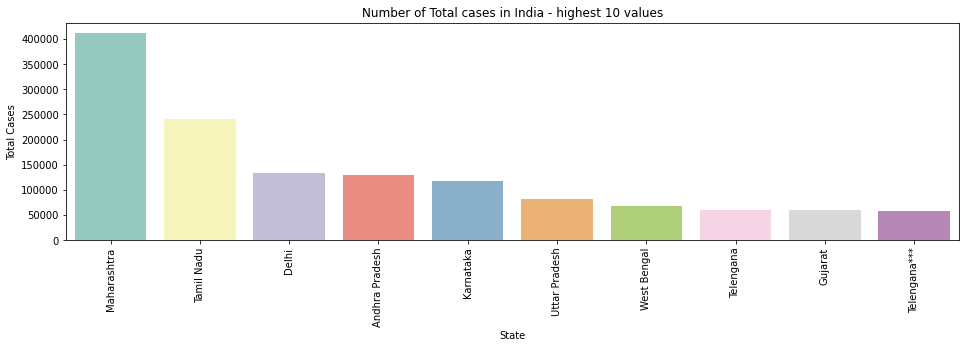

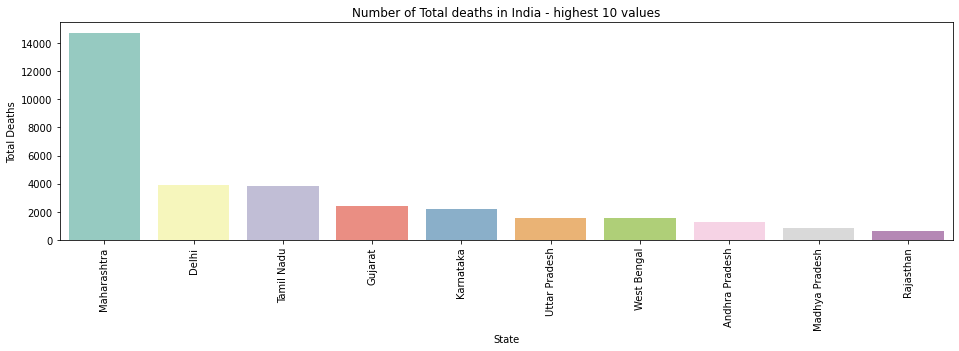

In [14]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

filtered_CVD = CVD.drop_duplicates(subset = ['State'], keep='first')
plot_bar('State', 'Total Cases', 'Total cases in India', filtered_CVD, size=4)
plot_bar('State', 'Total Deaths', 'Total deaths in India', filtered_CVD, size=4)


Plot world aggregate numbers for total cases and deaths. **bold text**

         Date  Total Cases  Total Deaths
0    01/02/20            2             0
1    01/03/20            3             0
2    01/04/20         1834            41
3    01/05/20        34972          1152
4    01/06/20       190535          5394
..        ...          ...           ...
197  30/07/20      1583792         34968
198  31/01/20            1             0
199  31/03/20         1397            35
200  31/05/20       182143          5164
201  31/07/20      1638870         35747

[202 rows x 3 columns]


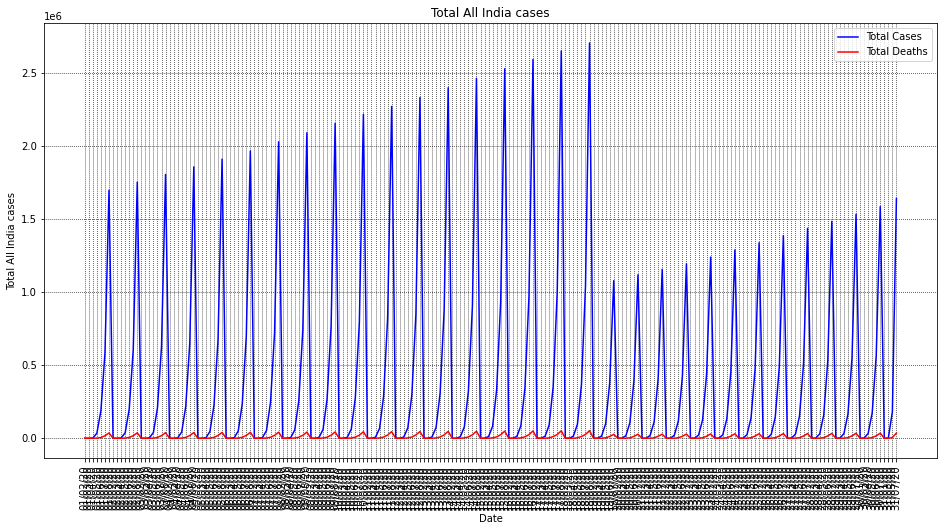

In [15]:
def plot_world_aggregate(df, title='Aggregate plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='blue', label='Total Cases')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel(f'Total {title} cases')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

#Group by dates. 
#Reset index because groupby by default makes grouped columns indices
#Sum values from all countries per given date
CVD_aggregate = CVD.groupby(['Date']).sum().reset_index()
print(CVD_aggregate)

plot_world_aggregate(CVD_aggregate, 'All India', size=4)

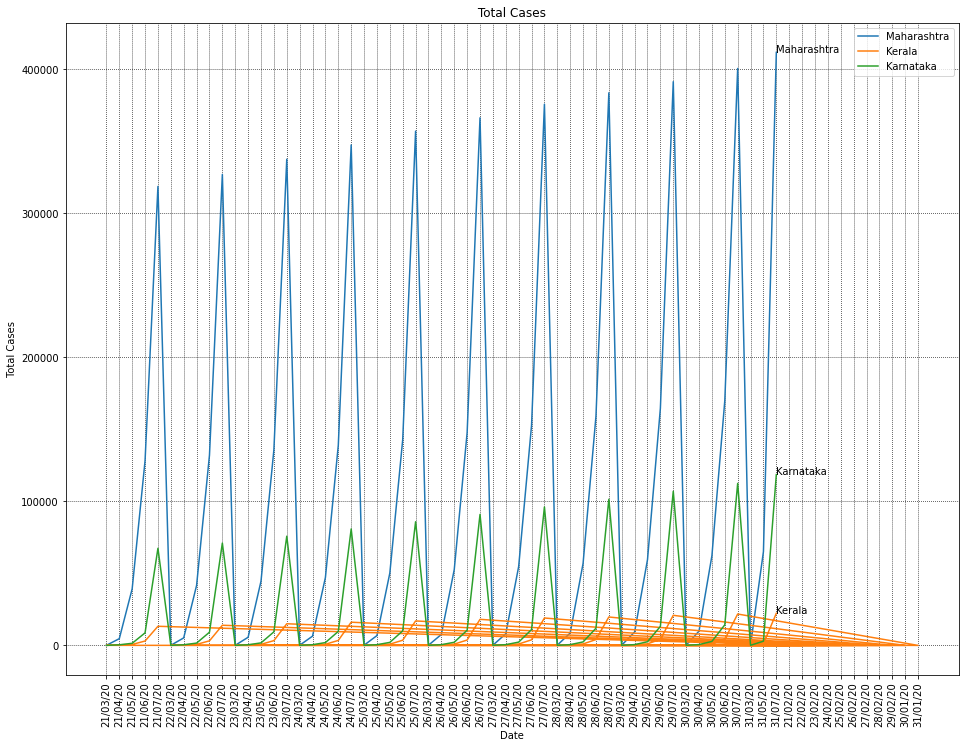

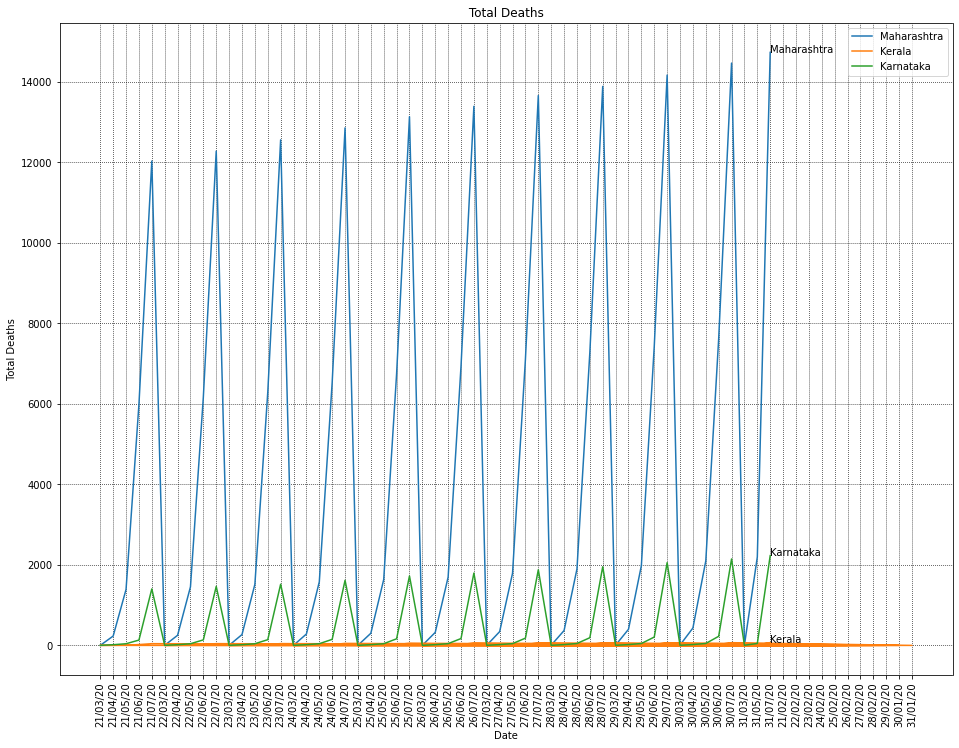

In [16]:
#Plot aggregate numbers for total cases and deaths for select countries. 
#Starting from Feb 15th 

def plot_aggregate_states(df, states, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for state in states:
        df_ = df[(df['State']==state) & (df['Date'] > '2020-03-01')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=state)  
        ax.text(max(df_['Date']), max(df_[case_type]), str(state))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

CVD_state_aggregate = CVD.groupby(['State', 'Date']).sum().reset_index()

states = ["Maharashtra", "Kerala", "Karnataka"]
plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Cases', size=4)    

plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Deaths', size=4)

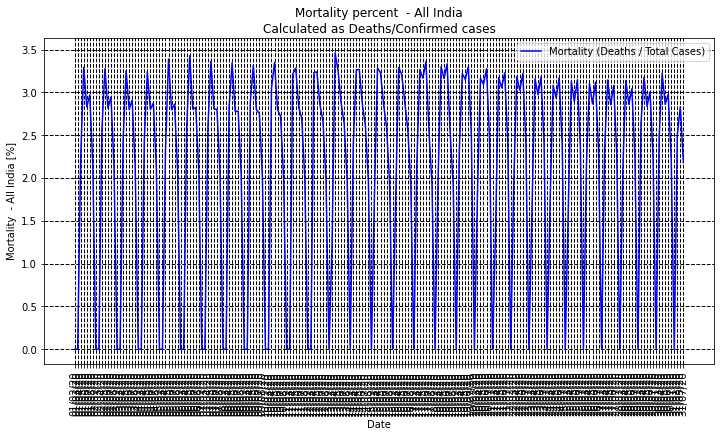

In [17]:
def plot_mortality(df, title='Mortality', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='blue', label='Mortality (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel(f'Mortality {title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality percent {title}\nCalculated as Deaths/Confirmed cases')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()  

CVD_aggregate['Mortality (Deaths/Cases)'] = CVD_aggregate['Total Deaths'] / CVD_aggregate['Total Cases'] * 100
plot_mortality(CVD_aggregate, title = ' - All India', size = 3)